In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [5]:
train = pd.read_csv("train.csv")

In [6]:
test = pd.read_csv("test.csv")

In [7]:
train.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [8]:
test.head()

id Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0  381110   Male   25                1         11.0                   1   
1  381111   Male   40                1         28.0                   0   
2  381112   Male   47                1         28.0                   0   
3  381113   Male   24                1         27.0                   1   
4  381114   Male   27                1         28.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    < 1 Year             No         35786.0                 152.0       53  
1    1-2 Year            Yes         33762.0                   7.0      111  
2    1-2 Year            Yes         40050.0                 124.0      199  
3    < 1 Year            Yes         37356.0                 152.0      187  
4    < 1 Year             No         59097.0                 152.0      297

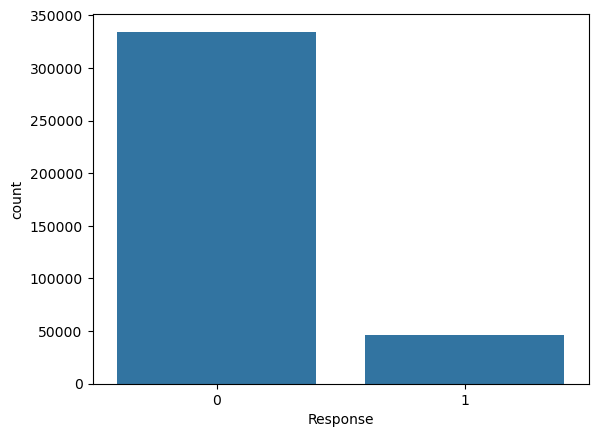

In [9]:
ax = sns.countplot(x = "Response",data = train)

In [10]:
train["Response"].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

### From above Plot it is visible that this is highly unbalanced dataset . As the number of people who don't want a insurance is pretty high and number of people who need is pretty low. lets calculate the percentage

In [23]:
# Finding the percent of Results
sum(train["Response"] == 1) / train.shape[0]  * 100

12.256336113815209

In [24]:
sum(train["Response"] == 0 ) / train.shape[0]  * 100

87.74366388618479

### 87 percent of the Customers are not interested from training data and only 12 Percent of the customers are interested

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [27]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [28]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [29]:
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

### Data has no NA values. All values are present

In [30]:
train.groupby('Gender')['Response'].value_counts(normalize = True)

Gender  Response
Female  0           0.896098
        1           0.103902
Male    0           0.861589
        1           0.138411
Name: proportion, dtype: float64

In [31]:
group = train.groupby('Gender')['Response'].value_counts(normalize = True).unstack()

<Axes: xlabel='Response', ylabel='Gender'>

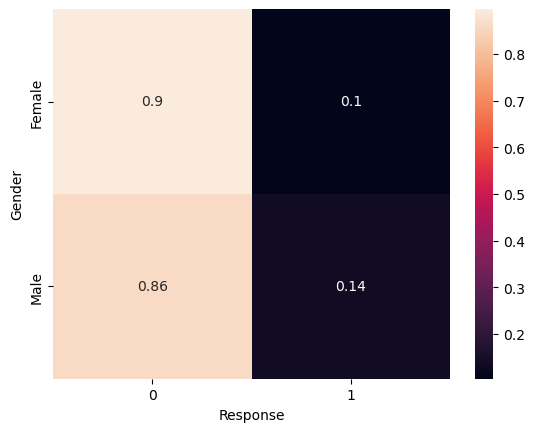

In [32]:
sns.heatmap(group , annot=True)

In [33]:
group = train.groupby('Driving_License')['Response'].value_counts(normalize = True).unstack()

<Axes: xlabel='Response', ylabel='Driving_License'>

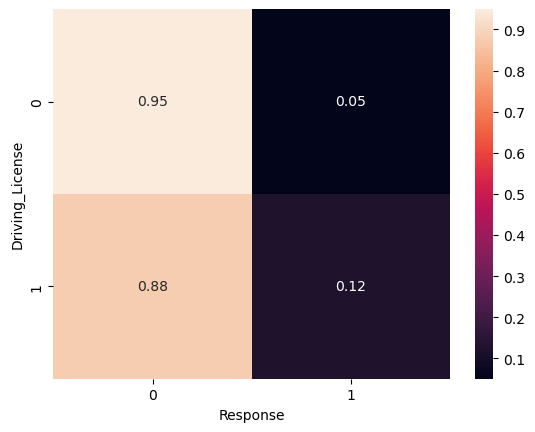

In [34]:
sns.heatmap(group , annot=True)

In [35]:
train.groupby('Driving_License')['Response'].value_counts(normalize = True)

Driving_License  Response
0                0           0.949507
                 1           0.050493
1                0           0.877283
                 1           0.122717
Name: proportion, dtype: float64

In [37]:
train["Vehicle_Age"].value_counts()

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

In [38]:
group = train.groupby('Vehicle_Age')['Response'].value_counts(normalize = True).unstack()

<Axes: xlabel='Response', ylabel='Vehicle_Age'>

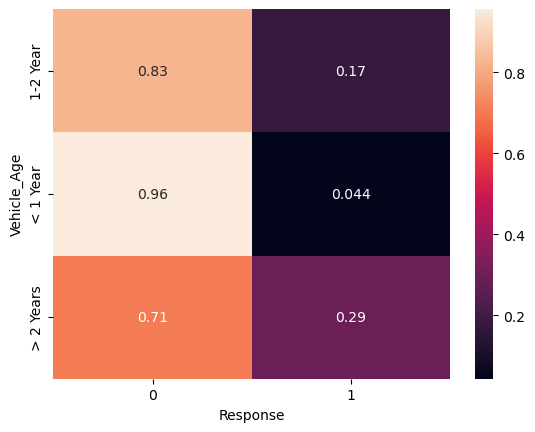

In [39]:
sns.heatmap(group , annot=True)

In [40]:
train["Vehicle_Damage"].value_counts()

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64

In [41]:
train.groupby('Vehicle_Damage')['Response'].value_counts(normalize = True)

Vehicle_Damage  Response
No              0           0.994796
                1           0.005204
Yes             0           0.762345
                1           0.237655
Name: proportion, dtype: float64

In [42]:
group = train.groupby('Vehicle_Damage')['Response'].value_counts(normalize = True).unstack()

<Axes: xlabel='Response', ylabel='Vehicle_Damage'>

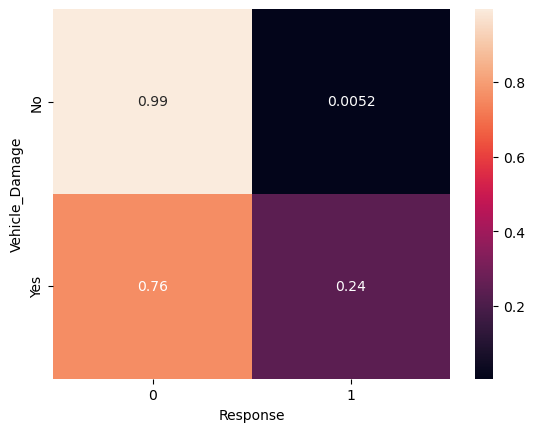

In [43]:
sns.heatmap(group , annot=True)

In [49]:
train.groupby('Previously_Insured')['Response'].value_counts(normalize = True)

Previously_Insured  Response
0                   0           0.774546
                    1           0.225454
1                   0           0.999095
                    1           0.000905
Name: proportion, dtype: float64

In [50]:
group = train.groupby('Previously_Insured')['Response'].value_counts(normalize = True).unstack()

<Axes: xlabel='Response', ylabel='Previously_Insured'>

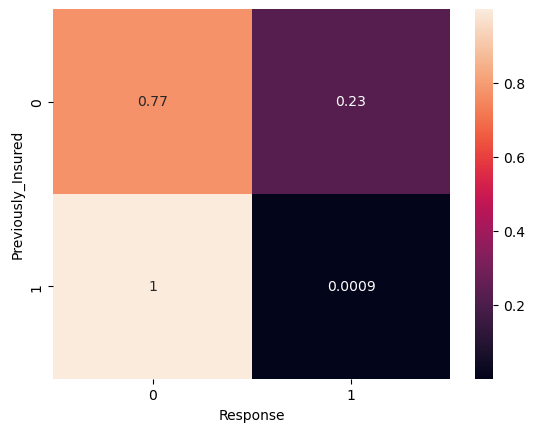

In [51]:
sns.heatmap(group , annot=True)

## Insights from Data Analysis Above
### Gender and Response of taking new insurance is equally distributed. There is no big skew in data based on genders
### People having driving license are slightly more likely to take new insurance compared to people not having one
### Vehicles older than 2 years are more prone to take insurance. people having less than 1 year old vehicle are very less likely to take insurance. People having vehicles between 1 to 2 years are slighly more likely than people having vehicle less than 1 year old. It could be because vehicles come with insurance for atleast a year 
### Vehicles having damage are more likely to get a new insurance compared to vehicles with no damage
### Previouly Insured are less likely to get a new insurance

In [52]:
train["Annual_Premium"].value_counts()

Annual_Premium
2630.0      64877
69856.0       140
39008.0        41
38287.0        38
45179.0        38
            ...  
14838.0         1
52535.0         1
15182.0         1
143525.0        1
69845.0         1
Name: count, Length: 48838, dtype: int64

In [56]:
 train.groupby(["Annual_Premium"])["Response"].value_counts(normalize = True)

Annual_Premium  Response
2630.0          0           0.868906
                1           0.131094
6098.0          0           1.000000
7670.0          0           1.000000
8739.0          0           1.000000
                              ...   
489663.0        1           1.000000
495106.0        0           1.000000
508073.0        0           1.000000
540165.0        0           0.750000
                1           0.250000
Name: proportion, Length: 70294, dtype: float64

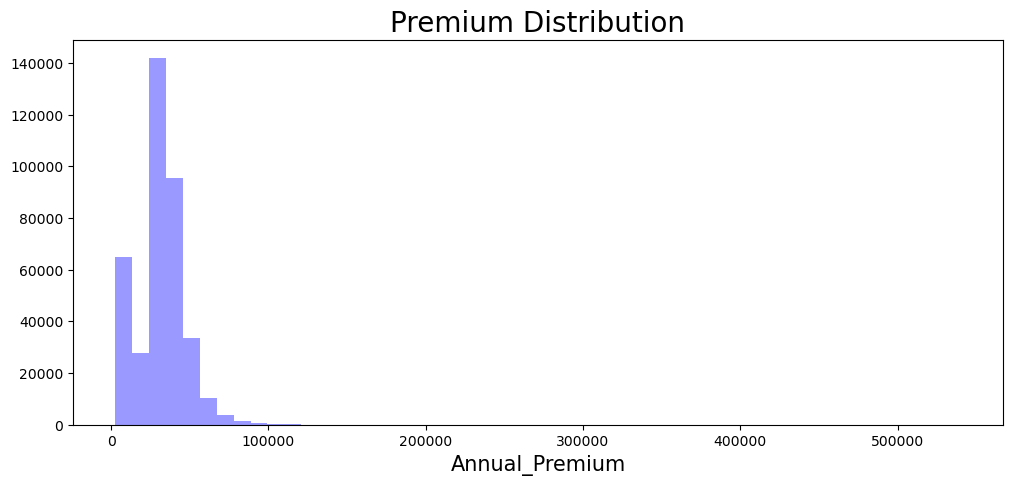

In [60]:
plt.figure(figsize = (12,5))
sns.distplot(train['Annual_Premium'], kde = False, color = 'Blue')
plt.xlabel('Annual_Premium', fontsize = 15)
plt.title('Premium Distribution', fontsize = 20)
plt.show()

In [55]:
train["Policy_Sales_Channel"].value_counts()

Policy_Sales_Channel
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: count, Length: 155, dtype: int64

<Axes: xlabel='Policy_Sales_Channel', ylabel='Annual_Premium'>

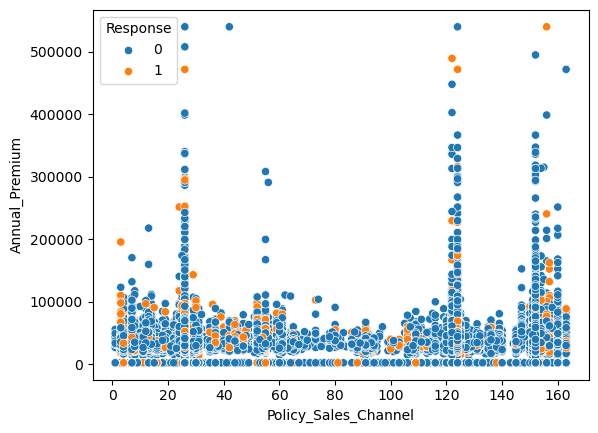

In [68]:
sns.scatterplot(x = "Policy_Sales_Channel" , y= 'Annual_Premium', hue = "Response",data = train)

<Axes: xlabel='Age', ylabel='Annual_Premium'>

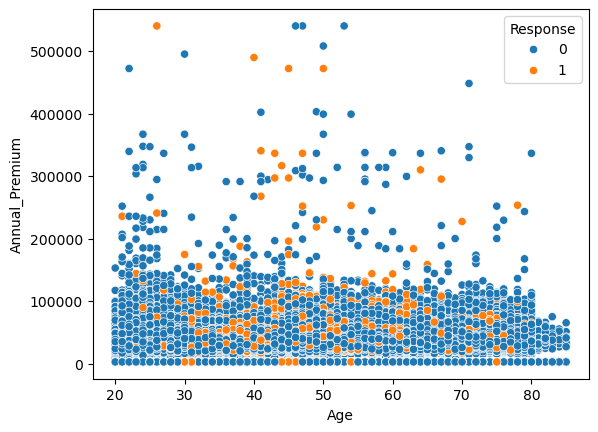

In [69]:
sns.scatterplot(x = "Age" , y= 'Annual_Premium', hue = "Response",data = train)

## Insights
### Premium are mostly between 0 to 1 Lakh
### There is evenly distributed between age and annual premium and response
### There is evenly distributed between Policy channel and annual premium and response
### They are few policy channels which are highly used 

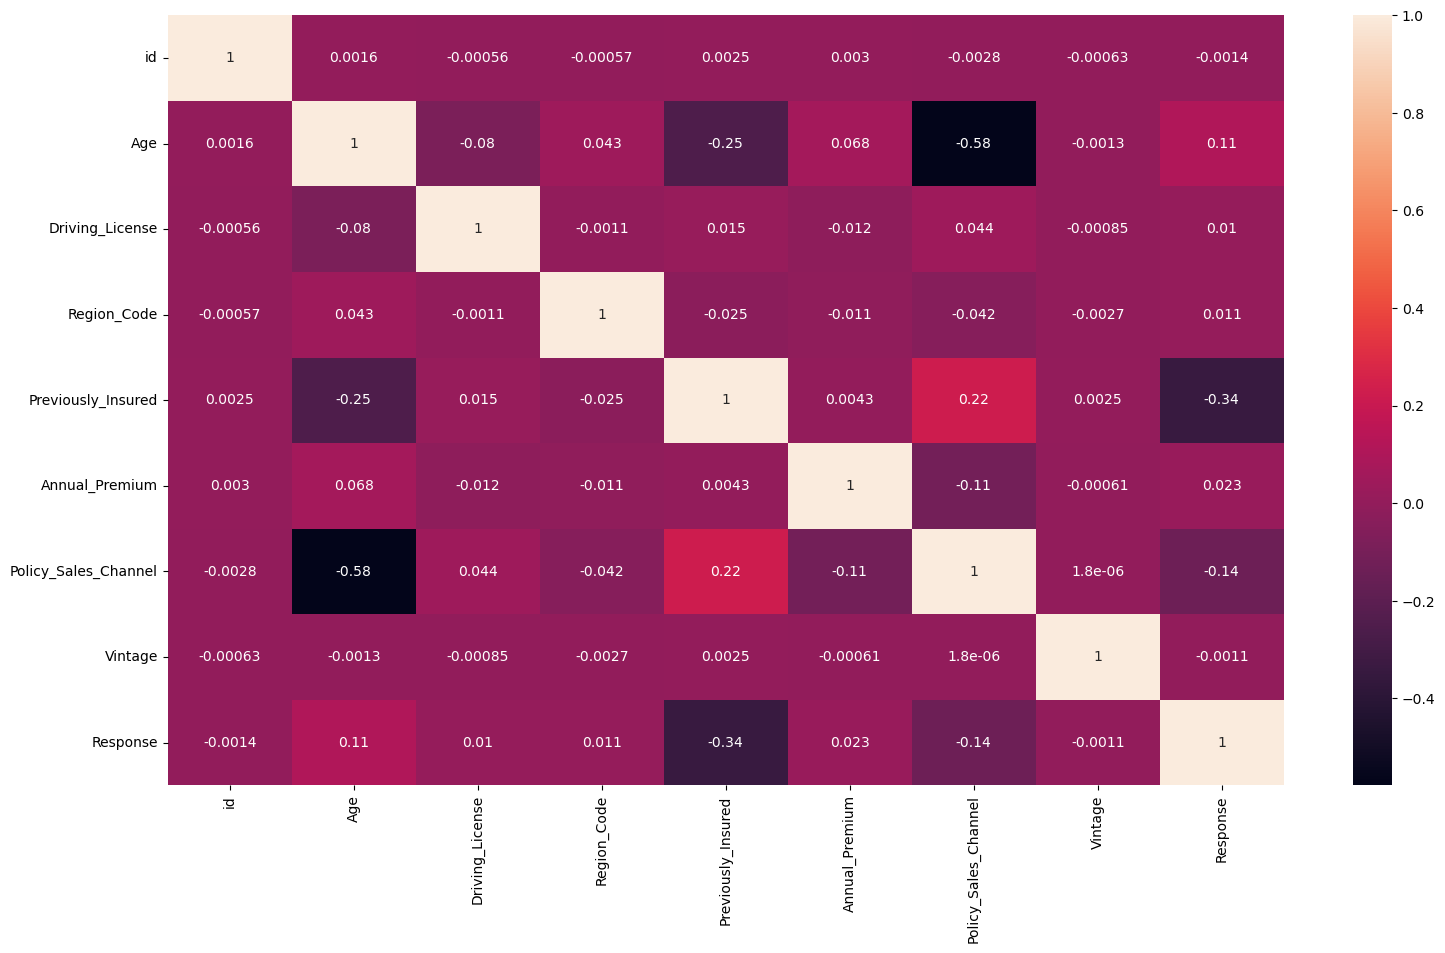

In [83]:
plt.figure(figsize = (18,10))
sns.heatmap(train.select_dtypes(include=np.number).corr(), annot = True)
plt.show()

In [73]:
train["Vintage"].value_counts()

Vintage
256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: count, Length: 290, dtype: int64

In [74]:
 train.groupby(["Vintage"])["Response"].value_counts(normalize = True)

Vintage  Response
10       0           0.887872
         1           0.112128
11       0           0.857887
         1           0.142113
12       0           0.868735
                       ...   
297      1           0.110592
298      0           0.865607
         1           0.134393
299      0           0.868277
         1           0.131723
Name: proportion, Length: 580, dtype: float64

<Axes: xlabel='Vintage', ylabel='Annual_Premium'>

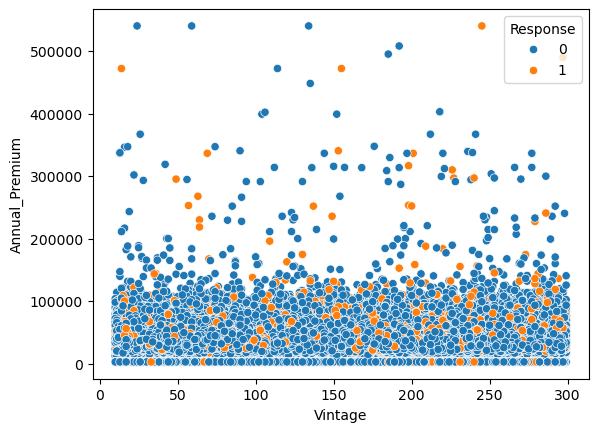

In [82]:
sns.scatterplot(x = "Vintage" , y= 'Annual_Premium', hue = "Response",data = train)

### No specific correlation between vintage and Response

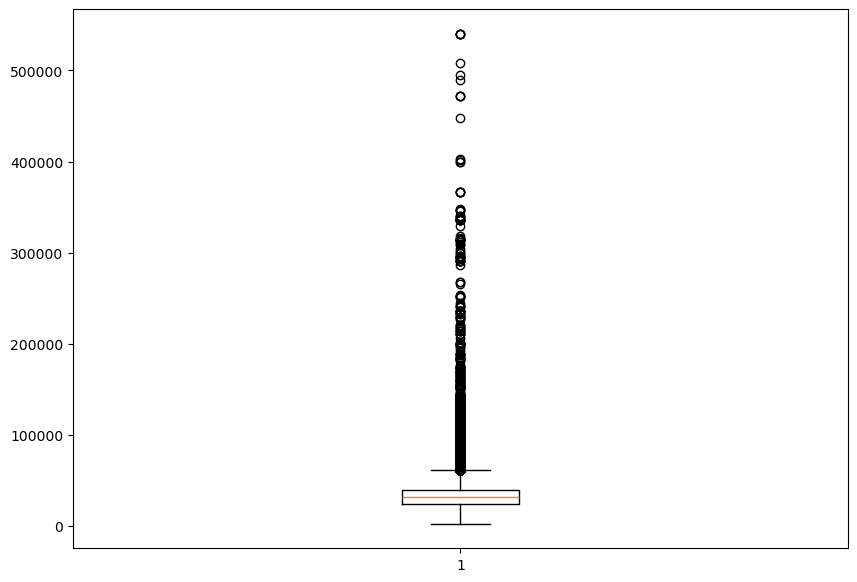

In [85]:

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(train["Annual_Premium"])

# show plot
plt.show()

In [86]:
train.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

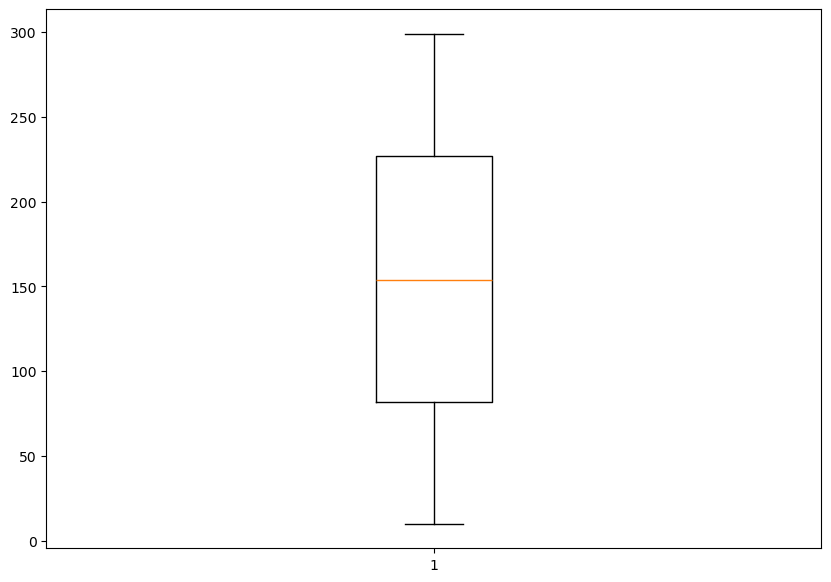

In [87]:

fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(train["Vintage"])

# show plot
plt.show()

In [92]:
train["Region_Code"].value_counts()

Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: count, dtype: int64

In [ ]:
train["Region"].value_counts()

In [94]:
 group = train.groupby(["Region_Code"])["Response"].value_counts(normalize = True).unstack()

<Axes: xlabel='Region_Code'>

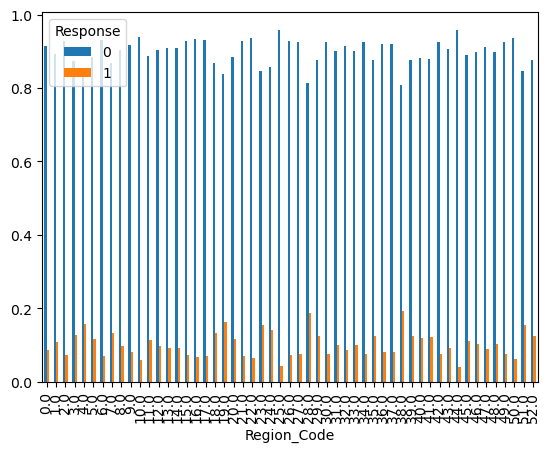

In [123]:
group.plot(kind = "bar")


### Insights
## There is no particular correlation with Region code

# Modelling


In [124]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [125]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [131]:
# separate category and numeric features

cat_cols = [ 'Gender', 'Vehicle_Age', 'Vehicle_Damage']

num_cols = ['Age','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage']
tgt_col = ['Response']
ign_cols = ['id']

In [127]:
# categorical preperation

cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')), # missing values
    ('ohe',OneHotEncoder(handle_unknown='ignore')) # categetoy encoding
])

In [128]:
# numerical features preperation

num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='median')), # missing values
    ('scale',StandardScaler()) # standard scaler
])


In [129]:
# map tranformation to features

preprocess = ColumnTransformer(
    transformers =[
        ('cat_encode',cat_pipe_encode,cat_cols),
        ('num_encode',num_pipe_encode,num_cols)
    ]
)

In [130]:
# integrate preprocessing and model

model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',LogisticRegression())
])

In [132]:
X = train.drop(columns=ign_cols+tgt_col)
X.head(2)

Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
0   Male   44                1         28.0                   0   > 2 Years   
1   Male   76                1          3.0                   0    1-2 Year   

  Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0            Yes         40454.0                  26.0      217  
1             No         33536.0                  26.0      183

In [134]:
y = train[tgt_col]
y.head(2)

Response
0         1
1         0

In [135]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [137]:
train_X, val_X, train_y, val_y = train_test_split(X,y, 
                                         random_state=42, test_size=0.2)
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((304887, 10), (76222, 10), (304887, 1), (76222, 1))

In [139]:
model_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model', LogisticRegression())])

In [140]:
# fit the model

model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model', LogisticRegression())])

In [141]:
# predict target with probability

model_pipeline.predict_proba(val_X)

array([[9.99564202e-01, 4.35797507e-04],
       [7.22706620e-01, 2.77293380e-01],
       [6.87808508e-01, 3.12191492e-01],
       ...,
       [9.99597375e-01, 4.02625075e-04],
       [9.99549913e-01, 4.50086619e-04],
       [9.99503183e-01, 4.96816740e-04]])

In [142]:
# predict target 

model_pipeline.predict(val_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:
# evaluation method

def model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline):
    
    predicted_train_tgt = model_pipeline.predict(train_X)
    predicted_val_tgt = model_pipeline.predict(val_X)

    print('Train AUC', roc_auc_score(train_y,predicted_train_tgt),sep='\n')
    print('Valid AUC', roc_auc_score(val_y,predicted_val_tgt),sep='\n')

    print('Train cnf_matrix', confusion_matrix(train_y,predicted_train_tgt),sep='\n')
    print('Valid cnf_matrix', confusion_matrix(val_y,predicted_val_tgt),sep='\n')

    print('Train cls_rep', classification_report(train_y,predicted_train_tgt),sep='\n')
    print('Valid cls rep', classification_report(val_y,predicted_val_tgt),sep='\n')

    # plot roc-auc
    y_pred_proba = model_pipeline.predict_proba(val_X)[:,1]
    plt.figure()
    fpr, tpr, thrsh = roc_curve(val_y,y_pred_proba)
    #roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr)
    plt.show()
#model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)    

Train AUC
0.500067599016647
Valid AUC
0.5
Train cnf_matrix
[[267693      7]
 [ 37181      6]]
Valid cnf_matrix
[[66699     0]
 [ 9523     0]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.46      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.67      0.50      0.47    304887
weighted avg       0.83      0.88      0.82    304887

Valid cls rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



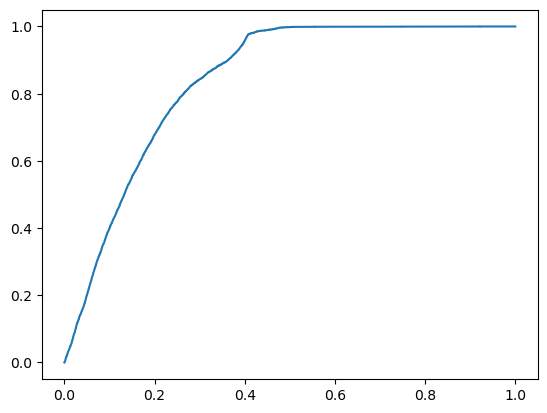

In [144]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_pipeline)

In [145]:
params = [
    {
    'model': [LogisticRegression()],
    'model__penalty':['l2',None],
    'model__C':[0.5,3]
    }    
]

In [146]:
# map the grid parameters with pipeline

grid = GridSearchCV(estimator=model_pipeline, param_grid=params, 
                    cv=2, scoring='roc_auc')

In [147]:
# fit the grid model

grid.fit(train_X, train_y)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model': [LogisticRegression()], 'model__C': [0.5, 3],
                          'model__penalty': ['l2', None]}],
             scoring='roc_auc')

In [148]:
# get the best parameter

grid.best_params_

{'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}

In [150]:
# read the submission file
#predict with the last model
#and upload into the hack website

sub = pd.read_csv('sample_submission_iA3afxn.csv')
sub.head(3)

id  Response
0  381110         0
1  381111         0
2  381112         0

In [151]:
train.columns.difference(test.columns)

Index(['Response'], dtype='object')

In [152]:
# updating the existing target values with predicted values
sub['Response'] = model_pipeline.predict(test)
sub.to_csv('sub_1.csv',index=False)

In [153]:
sub.to_csv('sub_1.csv',index=False)

In [154]:
sub

id  Response
0       381110         0
1       381111         0
2       381112         0
3       381113         0
4       381114         0
...        ...       ...
127032  508142         0
127033  508143         0
127034  508144         0
127035  508145         0
127036  508146         0

[127037 rows x 2 columns]

In [155]:
# show the grid results

res_df = pd.DataFrame(grid.cv_results_,)
pd.set_option('display.max_colwidth',100)
res_df[['params','mean_test_score','rank_test_score']]

params  \
0  {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': 'l2'}   
1  {'model': LogisticRegression(), 'model__C': 0.5, 'model__penalty': None}   
2    {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': 'l2'}   
3    {'model': LogisticRegression(), 'model__C': 3, 'model__penalty': None}   

   mean_test_score  rank_test_score  
0         0.835581                4  
1         0.835582                1  
2         0.835582                3  
3         0.835582                1

In [156]:
sub['Response'].value_counts()

Response
0    127034
1         3
Name: count, dtype: int64

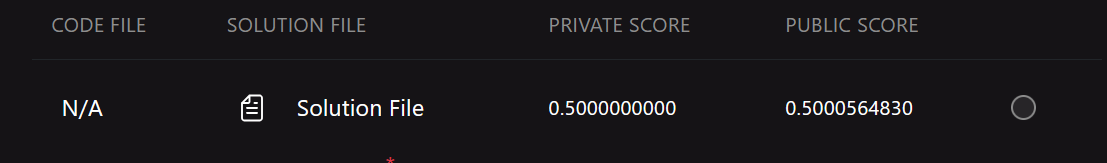

Results

### We can infer that we are not able to replicate the predicted value 1 because the samples are less for the case of 1 . Our generated results 0 as predicted values for 99.9 percent of values. Score is 0.5 which means the use case required both 0 and 1 to be predicted properly but this has been a random prediction

### We have to try the method of oversampling or undersampling in this case. But before that we need to try RandomForestClassifier because it splits and learns the data by bagging . So the samples present with value as 1 has better learning. Also in this method OOB should be used

In [157]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier, StackingClassifier

In [228]:
param_grid = [{
    'n_estimators' : [100, 150],
    # 'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 7],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [3, 5],
    'max_features': [0.3, 0.4]
}]

params_2 = [
    {
    'model': [RandomForestClassifier()],
    'model__n_estimators':[50,100],
    'model__criterion': ['entropy'],
    'model__max_depth': [ 5, 7],
    'model__min_samples_split' : [3,5],
    'model__min_samples_leaf' : [ 3,5]
        
    }
]


In [229]:
# integrate preprocessing and model

model_pipeline1 = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',RandomForestClassifier())
])

In [230]:
grid = GridSearchCV(estimator = model_pipeline1, param_grid = params_2, cv = 5, verbose = 2, scoring = 'roc_auc')

In [198]:
%%time
grid.fit(train_X, train_y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100; total time=  13.0s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100; total time=  12.4s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100; total time=  12.4s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100; total time=  12.0s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=100; total time=  12.3s
[CV] END 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sca...
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid=[{'model': [RandomForestClassifier()],
                          'model__criterion': ['entropy'],
                          'model__max_depth': [5, 7],
                          'model__min_samples_leaf': [3, 5],
                          'model__min_samples_split': [3, 5],
                          'model__n_estimators': [100, 150]}],
             scoring='roc_auc', verbose=2)

In [199]:
grid.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=7,
                                        min_samples_leaf=3, min_samples_split=3,
                                        n_estimators=150))])

In [200]:
grid.cv_results_

{'mean_fit_time': array([12.19820752, 17.72388701, 12.30188088, 17.80036988, 12.2129149 ,
        18.13317146, 12.19517083, 17.6822648 , 15.08029699, 22.4835917 ,
        14.9048377 , 23.29905591, 15.18315468, 23.33801064, 16.88012719,
        22.57264247]),
 'std_fit_time': array([0.31839861, 0.30052501, 0.30479845, 0.1862849 , 0.29702764,
        0.33894766, 0.23851641, 0.21845904, 0.41399324, 0.5558142 ,
        0.23740154, 1.2915439 , 0.09265672, 1.1514738 , 2.11874564,
        0.23380825]),
 'mean_score_time': array([0.3090981 , 0.42881303, 0.31590691, 0.43281903, 0.3083993 ,
        0.43543348, 0.31167312, 0.44293919, 0.40555887, 0.51153727,
        0.40907164, 0.55254455, 0.38547339, 0.54620776, 0.41056314,
        0.54076591]),
 'std_score_time': array([0.01130453, 0.04016933, 0.01812778, 0.02127909, 0.00727025,
        0.03398559, 0.01487182, 0.03502563, 0.03081786, 0.01629977,
        0.02476801, 0.02843018, 0.01282623, 0.04529245, 0.01918482,
        0.02963706]),
 'param_mo

In [202]:
model_unsampled_rf = grid.best_estimator_

In [203]:
# predict target with probability

model_unsampled_rf.predict_proba(val_X)

array([[9.99168918e-01, 8.31082447e-04],
       [7.24174649e-01, 2.75825351e-01],
       [7.07619678e-01, 2.92380322e-01],
       ...,
       [9.99276672e-01, 7.23328214e-04],
       [9.99216819e-01, 7.83181426e-04],
       [9.99337749e-01, 6.62251343e-04]])

Train AUC
0.5
Valid AUC
0.5
Train cnf_matrix
[[267700      0]
 [ 37187      0]]
Valid cnf_matrix
[[66699     0]
 [ 9523     0]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    267700
           1       0.00      0.00      0.00     37187

    accuracy                           0.88    304887
   macro avg       0.44      0.50      0.47    304887
weighted avg       0.77      0.88      0.82    304887

Valid cls rep
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.44      0.50      0.47     76222
weighted avg       0.77      0.88      0.82     76222



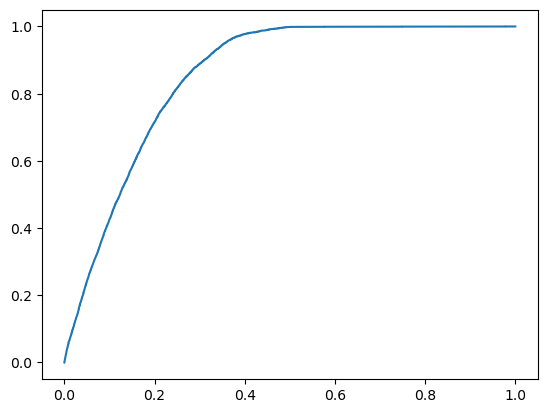

In [226]:
model_train_val_eval(train_X,val_X,train_y,val_y,model_unsampled_rf)

In [402]:
# updating the existing target values with predicted values
sub['Response'] = model_unsampled_rf.predict(test)


### From the vales even after using random forest we are able to see that all are predicted as 0 which is not expected. So we have to go with oversampling or undersampling methods

In [403]:
sub['Response'].value_counts() ###still all values are predicted as 0

Response
0    127037
Name: count, dtype: int64

In [207]:
from imblearn.over_sampling import RandomOverSampler

In [208]:
over_sampling = RandomOverSampler()

In [231]:
train_X_os, train_y_os = over_sampling.fit_resample(train_X,train_y)

In [232]:
train_y_os.value_counts()

Response
0           267700
1           267700
Name: count, dtype: int64

### Oversampled fitting

In [233]:
%%time
grid.fit(train_X_os, train_y_os)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50; total time=  11.7s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50; total time=  12.2s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50; total time=  12.3s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50; total time=  12.3s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=50; total time=  11.9s
[CV] END model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sca...
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid=[{'model': [RandomForestClassifier()],
                          'model__criterion': ['entropy'],
                          'model__max_depth': [5, 7],
                          'model__min_samples_leaf': [3, 5],
                          'model__min_samples_split': [3, 5],
                          'model__n_estimators': [50, 100]}],
             scoring='roc_auc', verbose=2)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [234]:
model_oversampled_rf = grid.best_estimator_

In [237]:
# predict target with probability

model_oversampled_rf.predict_proba(val_X)

array([[0.99312297, 0.00687703],
       [0.26382348, 0.73617652],
       [0.25882722, 0.74117278],
       ...,
       [0.99514962, 0.00485038],
       [0.99308012, 0.00691988],
       [0.99503959, 0.00496041]])

Train AUC
0.7941333582368323
Valid AUC
0.7965543518597094
Train cnf_matrix
[[173618  94082]
 [ 16139 251561]]
Valid cnf_matrix
[[43496 23203]
 [  562  8961]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.91      0.65      0.76    267700
           1       0.73      0.94      0.82    267700

    accuracy                           0.79    535400
   macro avg       0.82      0.79      0.79    535400
weighted avg       0.82      0.79      0.79    535400

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.65      0.79     66699
           1       0.28      0.94      0.43      9523

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.74     76222



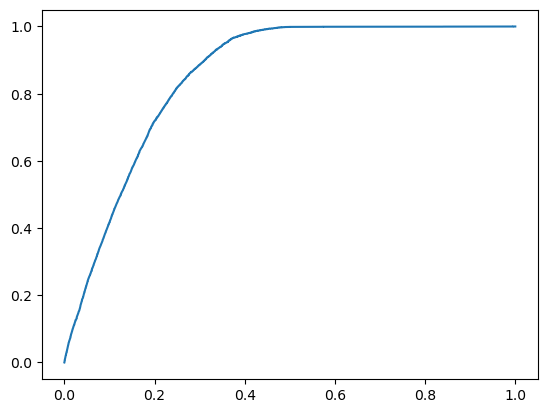

In [238]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,model_oversampled_rf)

In [241]:
# updating the existing target values with predicted values
sub['Response'] = model_oversampled_rf.predict(test)


In [242]:
sub['Response'].value_counts()

Response
0    73439
1    53598
Name: count, dtype: int64

In [243]:
sub.to_csv('sub_2.csv',index=False)

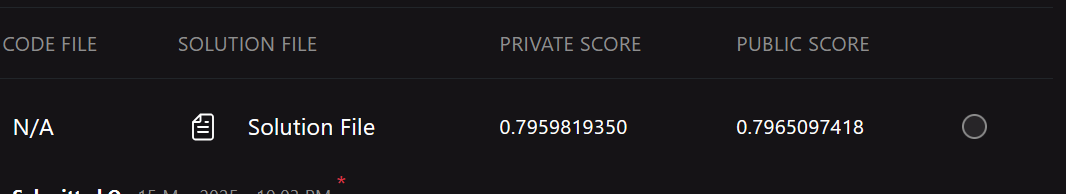

### with Oversampled data we are seeing improvements in the scores

# XGB Boost

In [283]:
import xgboost as xgb
params_3 = [
    {
    'model1': [xgb.XGBClassifier()]
    }
]


In [284]:
# integrate preprocessing and model

model_pipeline2 = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model1',xgb.XGBClassifier())
])

In [285]:
grid1 = GridSearchCV(estimator = model_pipeline2, param_grid = params_3, cv = 5, verbose = 2, scoring = 'roc_auc')

In [286]:
%%time
grid1.fit(train_X_os, train_y_os)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END model1=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...); total time=   3.5s
[CV] END model1=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
         

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sca...
                                                   importance_type=None,
                                                   interaction_constraints=None,
                                                   learning_rate=None,
                                                   max_bin=None,
                                                   max_cat_threshold=None,
                                                   max_cat_to_onehot=None,
                                                   max_delta_step=None,
                                                   max_depth=None,
                                                   max_leaves=None,
                                                   min_child_weight=None,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   multi_strategy=None,
                                                   n_estimators=None,
                                                   n_jobs=None,
                                                   num_parallel_tree=None,
                                                   random_state=None, ...)]}],
             scoring='roc_auc', verbose=2)

In [287]:
model_oversampled_xgb = grid1.best_estimator_

Train AUC
0.820629435935749
Valid AUC
0.7983955141831819
Train cnf_matrix
[[185696  82004]
 [ 14031 253669]]
Valid cnf_matrix
[[46186 20513]
 [  911  8612]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.93      0.69      0.79    267700
           1       0.76      0.95      0.84    267700

    accuracy                           0.82    535400
   macro avg       0.84      0.82      0.82    535400
weighted avg       0.84      0.82      0.82    535400

Valid cls rep
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     66699
           1       0.30      0.90      0.45      9523

    accuracy                           0.72     76222
   macro avg       0.64      0.80      0.63     76222
weighted avg       0.90      0.72      0.77     76222



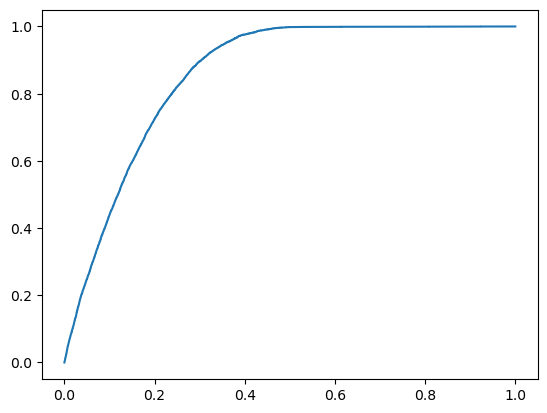

In [288]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,model_oversampled_xgb)

In [280]:
# updating the existing target values with predicted values
sub['Response'] = model_oversampled_xgb.predict(test)


In [281]:
sub.to_csv('sub_3.csv',index=False)

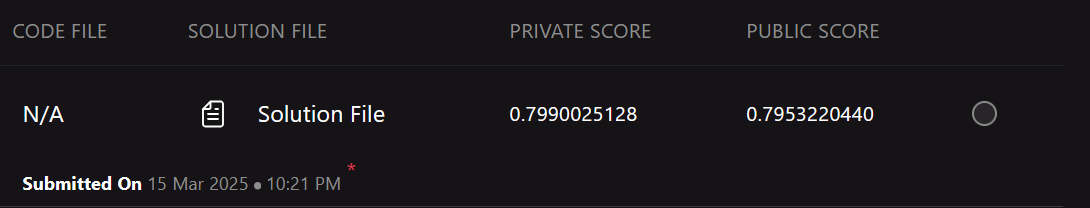


### Adaboost

In [289]:

params_4 = [
    {
    'model2': [AdaBoostClassifier()],
    'model2__n_estimators' : [50,100,150,200]
    }
]


In [290]:
# integrate preprocessing and model

model_pipeline3 = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model2',AdaBoostClassifier())
])

In [291]:
grid2 = GridSearchCV(estimator = model_pipeline3, param_grid = params_4, cv = 5, verbose = 2, scoring = 'roc_auc')

In [292]:
%%time
grid2.fit(train_X_os, train_y_os)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=  21.0s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=  18.7s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=  19.1s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=  18.9s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=  18.8s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=  36.6s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=  37.1s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=  36.7s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=  37.2s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=  38.3s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=150; total time=  54.4s
[CV] END model2=AdaBoostClassifi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model2', AdaBoostClassifier())]),
             param_grid=[{'model2': [AdaBoostClassifier()],
                          'model2__n_estimators': [50, 100, 150, 200]}],
             scoring='roc_auc', verbose=2)

In [294]:
model_oversampled_adaboost = grid2.best_estimator_

In [295]:
# updating the existing target values with predicted values
sub['Response'] = model_oversampled_adaboost.predict(test)


Train AUC
0.7975252147926783
Valid AUC
0.7986054840164045
Train cnf_matrix
[[177486  90214]
 [ 18191 249509]]
Valid cnf_matrix
[[44442 22257]
 [  658  8865]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.91      0.66      0.77    267700
           1       0.73      0.93      0.82    267700

    accuracy                           0.80    535400
   macro avg       0.82      0.80      0.79    535400
weighted avg       0.82      0.80      0.79    535400

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     66699
           1       0.28      0.93      0.44      9523

    accuracy                           0.70     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.70      0.75     76222



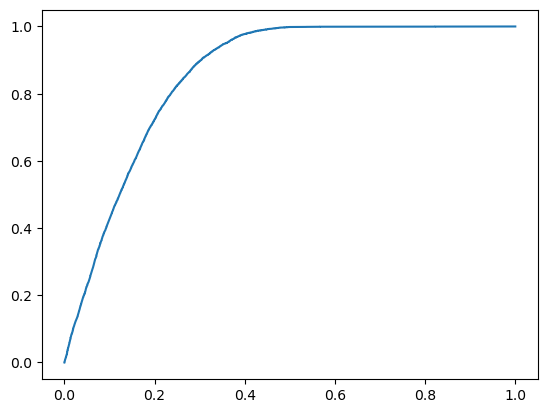

In [296]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,model_oversampled_adaboost)

In [297]:
sub.to_csv('sub_4.csv',index=False)

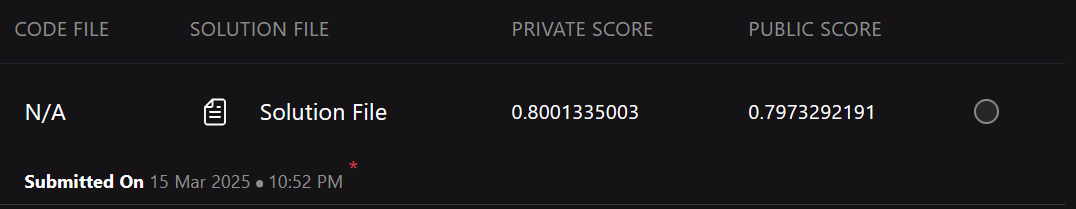


### Voting Model


In [315]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
clf1 = model_oversampled_rf
clf2 = model_oversampled_adaboost
clf3 = model_oversampled_xgb

grid2.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Region_Code',
                                                   'Previously_Insured',
                                                   'Annual_Premium',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('model2', AdaBoostClassifier(n_estimators=200))])

In [319]:
# integrate preprocessing and model

model_pipeline_voting = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model_voting',VotingClassifier(estimators = [('rf', RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=5)), ('ada', AdaBoostClassifier(n_estimators = 200)), ('xgb', xgb.XGBClassifier())]))
])

In [320]:
model_pipeline_voting.fit(train_X_os,train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Ag...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]))])

In [321]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,model_pipeline_voting)

Train AUC
0.8036533432947329
Valid AUC
0.8002026882130705
Train cnf_matrix
[[178021  89679]
 [ 15445 252255]]
Valid cnf_matrix
[[44543 22156]
 [  642  8881]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.92      0.67      0.77    267700
           1       0.74      0.94      0.83    267700

    accuracy                           0.80    535400
   macro avg       0.83      0.80      0.80    535400
weighted avg       0.83      0.80      0.80    535400

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     66699
           1       0.29      0.93      0.44      9523

    accuracy                           0.70     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.70      0.75     76222



AttributeError: This 'Pipeline' has no attribute 'predict_proba'

In [322]:
# updating the existing target values with predicted values
sub['Response'] = model_pipeline_voting.predict(test)


In [323]:
sub.to_csv('sub_voting.csv',index=False)

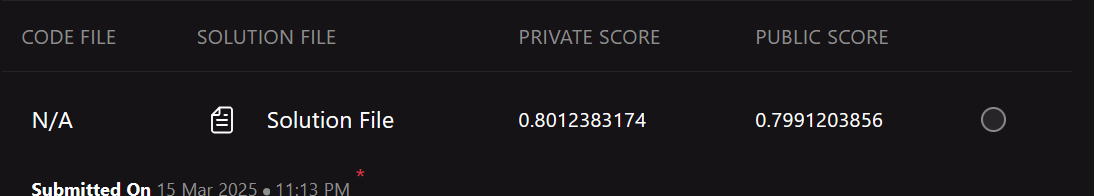

In [326]:
# integrate preprocessing and model

model_pipeline_stacking = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model_stacking',StackingClassifier(estimators = [('rf', RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=5)), ('ada', AdaBoostClassifier(n_estimators = 200)), ('xgb', xgb.XGBClassifier())],final_estimator=LogisticRegression()))
])

In [327]:
model_pipeline_stacking.fit(train_X_os,train_y_os)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Ag...
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=None,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               random_state=None, ...))],
                                    final_estimator=LogisticRegression()))])

Train AUC
0.8215558460963766
Valid AUC
0.7919357483981919
Train cnf_matrix
[[195077  72623]
 [ 22916 244784]]
Valid cnf_matrix
[[48343 18356]
 [ 1342  8181]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.89      0.73      0.80    267700
           1       0.77      0.91      0.84    267700

    accuracy                           0.82    535400
   macro avg       0.83      0.82      0.82    535400
weighted avg       0.83      0.82      0.82    535400

Valid cls rep
              precision    recall  f1-score   support

           0       0.97      0.72      0.83     66699
           1       0.31      0.86      0.45      9523

    accuracy                           0.74     76222
   macro avg       0.64      0.79      0.64     76222
weighted avg       0.89      0.74      0.78     76222



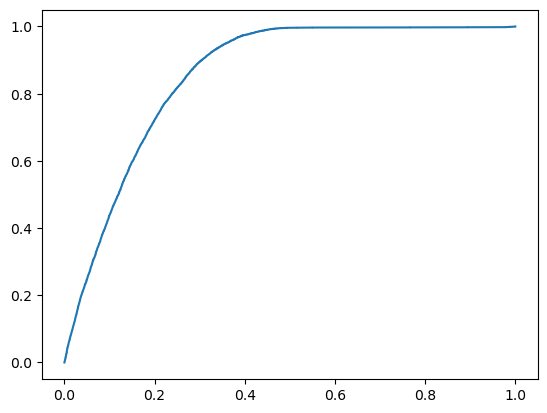

In [328]:
model_train_val_eval(train_X_os,val_X,train_y_os,val_y,model_pipeline_stacking)

In [329]:
# updating the existing target values with predicted values
sub['Response'] = model_pipeline_stacking.predict(test)


In [330]:
sub.to_csv('sub_stacking.csv',index=False)

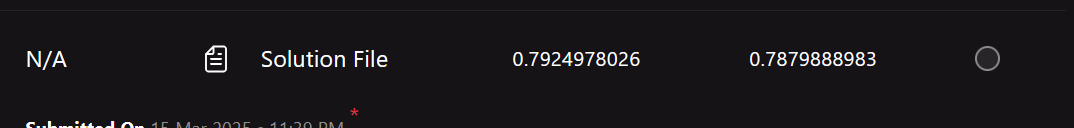

In [332]:
import joblib
joblib.dump(model_pipeline_voting,'job_pipeline_model_voting_cross_sell.pkl')

['job_pipeline_model_voting_cross_sell.pkl']


#### Choosing voting model with our XGB , RF and AdaBoost Models . It gives better AUC value in test more than 80 percent

### Next we try the same with undersampling

In [334]:
from imblearn.under_sampling import RandomUnderSampler
under_sampling = RandomUnderSampler()

In [338]:
train_X_us, train_y_us = under_sampling.fit_resample(train_X,train_y)

In [339]:
%%time
grid2.fit(train_X_us, train_y_us)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=   2.8s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=   2.2s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=   1.9s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=   1.7s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=50; total time=   1.8s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=   3.6s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=   4.0s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=   4.0s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=   3.4s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=100; total time=   3.5s
[CV] END model2=AdaBoostClassifier(), model2__n_estimators=150; total time=   5.6s
[CV] END model2=AdaBoostClassifi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model2', AdaBoostClassifier())]),
             param_grid=[{'model2': [AdaBoostClassifier()],
                          'model2__n_estimators': [50, 100, 150, 200]}],
             scoring='roc_auc', verbose=2)

In [340]:
model_undersampled_adaboost = grid2.best_estimator_

Train AUC
0.796098098797967
Valid AUC
0.7987713911603864
Train cnf_matrix
[[24518 12669]
 [ 2496 34691]]
Valid cnf_matrix
[[44233 22466]
 [  625  8898]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.91      0.66      0.76     37187
           1       0.73      0.93      0.82     37187

    accuracy                           0.80     74374
   macro avg       0.82      0.80      0.79     74374
weighted avg       0.82      0.80      0.79     74374

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.93      0.44      9523

    accuracy                           0.70     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.70      0.75     76222



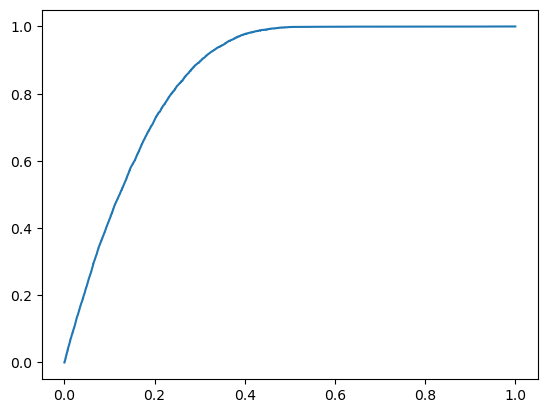

In [341]:
model_train_val_eval(train_X_us,val_X,train_y_us,val_y,model_undersampled_adaboost)

In [345]:
train_y_us.value_counts()

Response
0           37187
1           37187
Name: count, dtype: int64

In [346]:
train_y_os.value_counts()

Response
0           267700
1           267700
Name: count, dtype: int64

In [347]:
# updating the existing target values with predicted values
sub['Response'] = model_undersampled_adaboost.predict(test)


In [348]:
sub.to_csv('sub_undersampled_adaboost.csv',index=False)

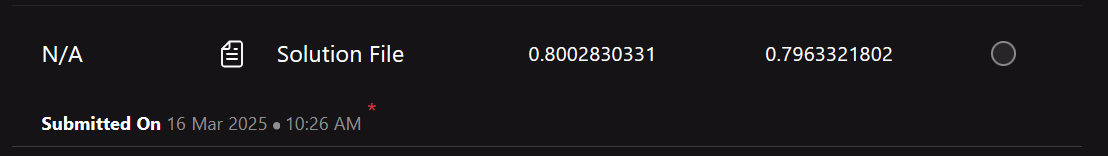

### 
params_4 = [
    {
    'model2': [AdaBoostClassifier()],
    'model2__n_estimators' : [50,100,150,200]
    }
]
Adaboost undersampled


In [350]:

params_undersampled = [
    {
    'model2': [AdaBoostClassifier()],
    'model2__n_estimators' : [50,100,150,200,500],
    'model2__learning_rate' : [0.0001,0.001,0.01,0.1,1.0]
    }
]

# integrate preprocessing and model

model_pipeline_adaboost_us = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model2',AdaBoostClassifier())
])


In [353]:
grid_ada_us = GridSearchCV(estimator = model_pipeline_adaboost_us, param_grid = params_undersampled, cv = 5, verbose = 2, scoring = 'roc_auc')

In [354]:
%%time
grid_ada_us.fit(train_X_us, train_y_us)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END model2=AdaBoostClassifier(), model2__learning_rate=0.0001, model2__n_estimators=50; total time=   1.7s
[CV] END model2=AdaBoostClassifier(), model2__learning_rate=0.0001, model2__n_estimators=50; total time=   1.7s
[CV] END model2=AdaBoostClassifier(), model2__learning_rate=0.0001, model2__n_estimators=50; total time=   2.0s
[CV] END model2=AdaBoostClassifier(), model2__learning_rate=0.0001, model2__n_estimators=50; total time=   1.9s
[CV] END model2=AdaBoostClassifier(), model2__learning_rate=0.0001, model2__n_estimators=50; total time=   2.1s
[CV] END model2=AdaBoostClassifier(), model2__learning_rate=0.0001, model2__n_estimators=100; total time=   3.4s
[CV] END model2=AdaBoostClassifier(), model2__learning_rate=0.0001, model2__n_estimators=100; total time=   3.3s
[CV] END model2=AdaBoostClassifier(), model2__learning_rate=0.0001, model2__n_estimators=100; total time=   3.4s
[CV] END model2=AdaBoostClassifier(), m

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Region_Code',
                                                                          'Previously_Insured',
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model2', AdaBoostClassifier())]),
             param_grid=[{'model2': [AdaBoostClassifier()],
                          'model2__learning_rate': [0.0001, 0.001, 0.01, 0.1,
                                                    1.0],
                          'model2__n_estimators': [50, 100, 150, 200, 500]}],
             scoring='roc_auc', verbose=2)

In [355]:
model_undersampled_adaboost = grid_ada_us.best_estimator_

Train AUC
0.7952779197031221
Valid AUC
0.7976933505321955
Train cnf_matrix
[[24224 12963]
 [ 2263 34924]]
Valid cnf_matrix
[[43753 22946]
 [  577  8946]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.91      0.65      0.76     37187
           1       0.73      0.94      0.82     37187

    accuracy                           0.80     74374
   macro avg       0.82      0.80      0.79     74374
weighted avg       0.82      0.80      0.79     74374

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.66      0.79     66699
           1       0.28      0.94      0.43      9523

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.74     76222



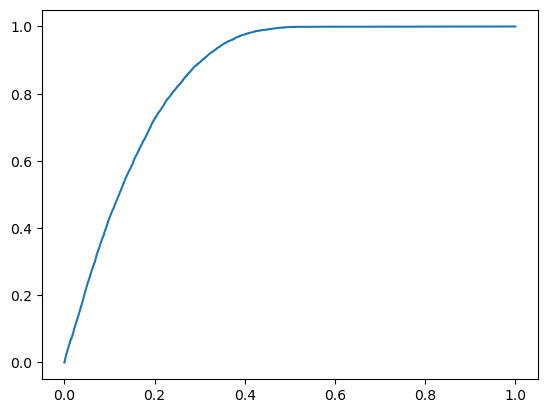

In [356]:
model_train_val_eval(train_X_us,val_X,train_y_us,val_y,model_undersampled_adaboost)

In [357]:
# updating the existing target values with predicted values
sub['Response'] = model_undersampled_adaboost.predict(test)


In [358]:
sub.to_csv('sub_undersampled_adaboost1.csv',index=False)

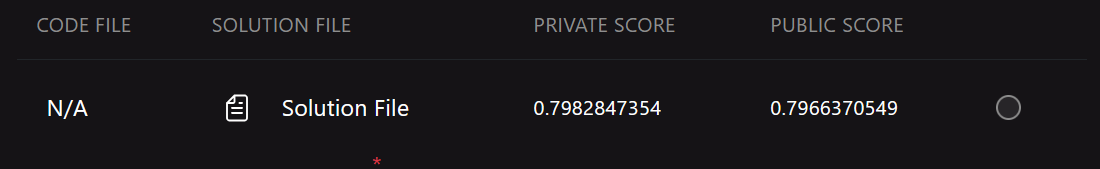

In [361]:

params_undersampled_xgb = [
    {
    'model2': [xgb.XGBClassifier()],
    'model2__min_child_weight' : [1,5,10],
    'model2__gamma' : [0.5,1,1.5,2,5],
    'model2__subsample' : [0.6,0.8,1.0],
    'model2__colsample_bytree' : [0.6,0.8,1.0],
    'model2__max_depth' : [3,4,5,6]
    }
]

# integrate preprocessing and model

model_pipeline_xgb_us = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model2',xgb.XGBClassifier())
])


In [362]:
grid_xgb_us = GridSearchCV(estimator = model_pipeline_xgb_us, param_grid = params_undersampled_xgb, cv = 5, verbose = 2, scoring = 'roc_auc')

In [363]:
%%time
grid_xgb_us.fit(train_X_us, train_y_us)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END model2=XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), model2__colsample_bytree=0.6, model2__gamma=0.5, model2__max_depth=3, model2__min_child_weight=1, model2__subsample=0.6; total time=   1.0s
[CV] END model2=XGBCl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sca...
                                                   min_child_weight=None,
                                                   missing=nan,
                                                   monotone_constraints=None,
                                                   multi_strategy=None,
                                                   n_estimators=None,
                                                   n_jobs=None,
                                                   num_parallel_tree=None,
                                                   random_state=None, ...)],
                          'model2__colsample_bytree': [0.6, 0.8, 1.0],
                          'model2__gamma': [0.5, 1, 1.5, 2, 5],
                          'model2__max_depth': [3, 4, 5, 6],
                          'model2__min_child_weight': [1, 5, 10],
                          'model2__subsample': [0.6, 0.8, 1.0]}],
             scoring='roc_auc', verbose=2)

In [388]:
model_undersampled_xgb = grid_xgb_us.best_estimator_

Train AUC
0.8013956490171297
Valid AUC
0.8013718518208263
Train cnf_matrix
[[24902 12285]
 [ 2486 34701]]
Valid cnf_matrix
[[44762 21937]
 [  651  8872]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     37187
           1       0.74      0.93      0.82     37187

    accuracy                           0.80     74374
   macro avg       0.82      0.80      0.80     74374
weighted avg       0.82      0.80      0.80     74374

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     66699
           1       0.29      0.93      0.44      9523

    accuracy                           0.70     76222
   macro avg       0.64      0.80      0.62     76222
weighted avg       0.90      0.70      0.75     76222



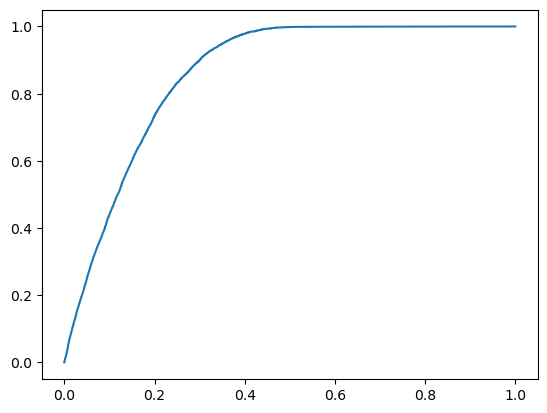

In [365]:
model_train_val_eval(train_X_us,val_X,train_y_us,val_y,model_undersampled_xgb)

In [396]:
# updating the existing target values with predicted values
sub['Response'] = model_undersampled_xgb.predict(test)


In [397]:
sub.to_csv('sub_undersampled_xgb.csv',index=False)

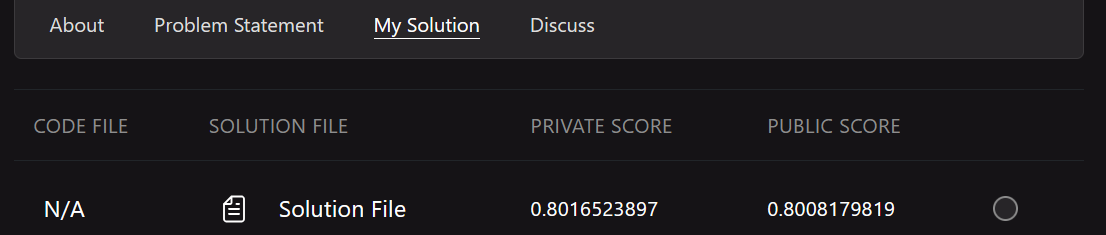

In [379]:

params_rf_us = [
    {
    'model': [RandomForestClassifier()],
    'model__n_estimators':[150,200,300],
    'model__criterion': ['entropy'],
    'model__max_depth': [ 5, 7],
    'model__min_samples_split' : [3,5],
    'model__min_samples_leaf' : [ 3,5],
    'model__max_features' : [0.5,0.7]
        
    }
]

model_pipeline_rf_us = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model',RandomForestClassifier())
])

In [380]:
grid_rf_us = GridSearchCV(estimator = model_pipeline_rf_us, param_grid = params_rf_us, cv = 5, verbose = 2, scoring = 'roc_auc')

In [381]:
%%time
grid_rf_us.fit(train_X_us, train_y_us)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__max_features=0.5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150; total time=  11.0s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__max_features=0.5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150; total time=  10.9s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__max_features=0.5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150; total time=   9.6s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__max_features=0.5, model__min_samples_leaf=3, model__min_samples_split=3, model__n_estimators=150; total time=  10.8s
[CV] END model=RandomForestClassifier(), model__criterion=entropy, model__max_depth=5, model__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_encode',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Vehicle_Age',
                                                                          'Vehicle_Damage']),
                                                                        ('num_encode',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('sca...
                                                                          'Annual_Premium',
                                                                          'Policy_Sales_Channel',
                                                                          'Vintage'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid=[{'model': [RandomForestClassifier()],
                          'model__criterion': ['entropy'],
                          'model__max_depth': [5, 7],
                          'model__max_features': [0.5, 0.7],
                          'model__min_samples_leaf': [3, 5],
                          'model__min_samples_split': [3, 5],
                          'model__n_estimators': [150, 200, 300]}],
             scoring='roc_auc', verbose=2)

In [383]:
model_undersampled_rf = grid_rf_us.best_estimator_

Train AUC
0.7952913652620539
Valid AUC
0.7975898073452017
Train cnf_matrix
[[24077 13110]
 [ 2115 35072]]
Valid cnf_matrix
[[43410 23289]
 [  530  8993]]
Train cls_rep
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     37187
           1       0.73      0.94      0.82     37187

    accuracy                           0.80     74374
   macro avg       0.82      0.80      0.79     74374
weighted avg       0.82      0.80      0.79     74374

Valid cls rep
              precision    recall  f1-score   support

           0       0.99      0.65      0.78     66699
           1       0.28      0.94      0.43      9523

    accuracy                           0.69     76222
   macro avg       0.63      0.80      0.61     76222
weighted avg       0.90      0.69      0.74     76222



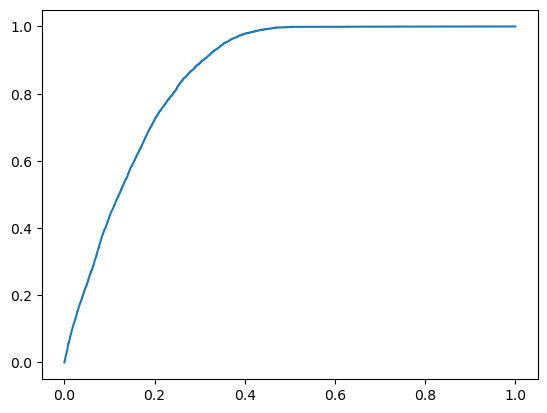

In [384]:
model_train_val_eval(train_X_us,val_X,train_y_us,val_y,model_undersampled_rf)

In [385]:
# updating the existing target values with predicted values
sub['Response'] = model_undersampled_rf.predict(test)


In [386]:
sub.to_csv('sub_undersampled_rf.csv',index=False)

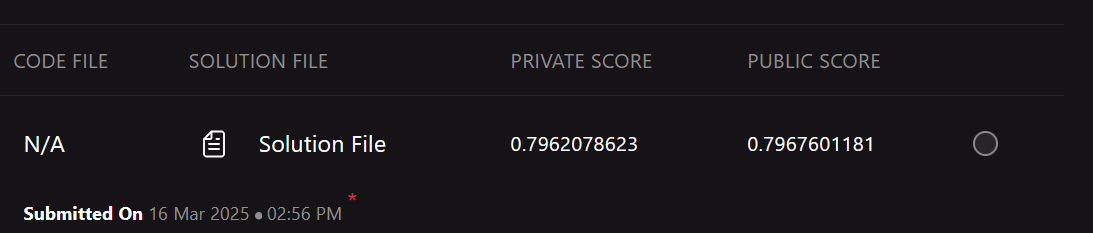

### Voting undersampled

In [392]:
# integrate preprocessing and model

model_pipeline_voting_us = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('model_voting',VotingClassifier(estimators = [('rf', RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.5,
                       min_samples_leaf=5, min_samples_split=3,
                       n_estimators=150)), ('ada',AdaBoostClassifier(learning_rate=0.1, n_estimators=500)), ('xgb', xgb.XGBClassifier(colsample_bytree=0.6,gamma=0.5,max_depth=3, min_child_weight=1))]))
])

In [393]:
model_pipeline_voting_us.fit(train_X_us,train_y_us)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Ag...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=1,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=None, ...))]))])

In [394]:
# updating the existing target values with predicted values
sub['Response'] = model_pipeline_voting_us.predict(test)


In [395]:
sub.to_csv('sub_undersampled_voting.csv',index=False)

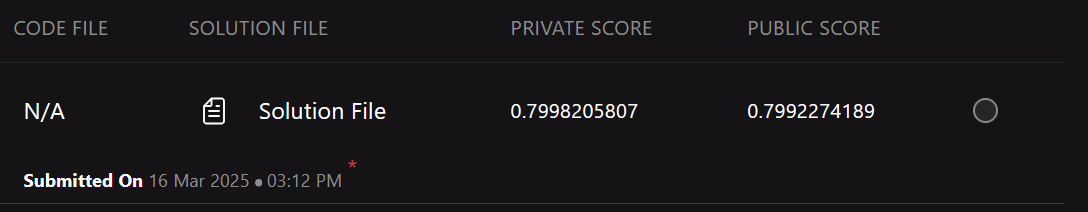

In [398]:

import joblib
joblib.dump(model_undersampled_xgb,'job_pipeline_model_undersampled_xgb.pkl')

['job_pipeline_model_undersampled_xgb.pkl']

In [399]:

joblib.dump(model_pipeline_voting,'job_pipeline_model_voting_cross_sell.pkl')

['job_pipeline_model_voting_cross_sell.pkl']

### The pickled two models have good score

### Voting model with oversampled data of random forest, XGB, ADABoost More than 0.80 which is 0.8012

### XGB model of undersampled values also has more than 0.80 which is 0.8016 and its public score is also better


### With both undersampled and oversampled approach , Not seeing much improvement but XGB of undersampled gives slightly better score